In [18]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt 
import numpy as np 
pyo.init_notebook_mode

alldata = pd.read_feather(r"C:\Users\jamen\Google Drive\Everything\Results\P1\ParticleTracking\AllParticleTracks.feather")

In [7]:
alldata

,index,Unnamed: 0,Frame Number,x position,y position,particle ID,frame rate,jet in focus,Experiment ID,Particle Index
0,0,0,10000070,441,176,0,1000,6,10,0
1,1,1,10000071,438,182,0,1000,6,10,0
2,2,2,10000072,436,190,0,1000,6,10,0
3,3,3,10000073,435,193,0,1000,6,10,0
4,4,4,10000074,434,194,0,1000,6,10,0
...,...,...,...,...,...,...,...,...,...,...
443,73,73,8000184,563,414,0,1000,6,8,3
444,74,74,8000185,562,417,0,1000,6,8,3
445,75,75,8000186,564,417,0,1000,6,8,3
446,76,76,8000187,565,420,0,1000,6,8,3


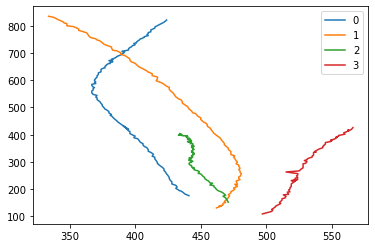

In [11]:
particle_index = alldata["Particle Index"].drop_duplicates().to_list()
for particle in particle_index:
    particle_df = alldata[alldata["Particle Index"] == particle]
    plt.plot(particle_df["x position"], particle_df["y position"], label = particle)
plt.legend()
plt.show()


In [39]:
scale = 1000/0.3 # 1000 pixels per 0.3m (approx)
alldata["delta x"] = 0
alldata["delta y"] = 0
alldata["tracking time"] = 0
for particle in particle_index:
    alldata.loc[alldata["Particle Index"] == particle,].sort_values(by = "Frame Number", axis = 0, ascending = True, inplace = True)
    alldata.loc[alldata["Particle Index"] == particle,"delta x"] = alldata.loc[alldata["Particle Index"] == particle,"x position"].diff()
    alldata.loc[alldata["Particle Index"] == particle,"delta y"] = alldata.loc[alldata["Particle Index"] == particle,"y position"].diff()
    alldata.loc[alldata["Particle Index"] == particle,"tracking time"] = (alldata.loc[alldata["Particle Index"] == particle,"Frame Number"] - 
    min(alldata.loc[alldata["Particle Index"] == particle,"Frame Number"])) / alldata.loc[alldata["Particle Index"] == particle,"frame rate"]
alldata["pixel velocity"] = np.sqrt(alldata["delta x"]**2.0 + alldata["delta y"]**2.0)
alldata["x velocity"] = alldata["delta x"] / alldata["frame rate"] * scale
alldata["y velocity"] = alldata["delta y"] / alldata["frame rate"] * scale
alldata["velocity"] = np.sqrt(alldata["x velocity"]**2.0 + alldata["y velocity"]**2.0)

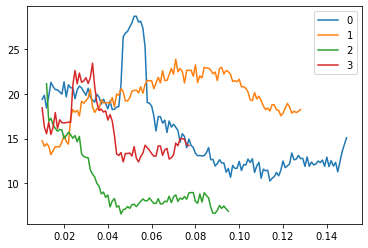

In [42]:
particle_index = alldata["Particle Index"].drop_duplicates().to_list()
for particle in particle_index:
    particle_df = alldata[alldata["Particle Index"] == particle]
    plt.plot(particle_df["tracking time"], particle_df["velocity"].rolling(10).mean(), label = particle)
plt.legend()
plt.show()